In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from math import sqrt
%matplotlib inline
np.set_printoptions(precision=3)


# Introducing Scikit-Learn


We aims to give an accessible introduction to how to use machine learning techniques using [scikit-learn](http://scikit-learn.org/) for your own projects and datasets. Among the ML libraries available today, scikit-learn shines as one of the best options.

[Scikit-learn](http://scikit-learn.org/) is a Python open source library designed to tackle Machine Learning problems from beginning to end. It is used and well praised by big companies like Evernote, Spotify etc as shown [here](http://scikit-learn.org/stable/testimonials/testimonials.html)


## Data Representation in Scikit-Learn

The best way to think about data within Scikit-Learn is in terms of tables of data. Consider the Cities data set below.

In [2]:
data = pd.read_csv('Data/Cities.csv')
data.head()

,city,country,latitude,longitude,temperature
0,Aalborg,Denmark,57.03,9.92,7.52
1,Aberdeen,United Kingdom,57.17,-2.08,8.10
2,Abisko,Sweden,63.35,18.83,0.20
3,Adana,Turkey,36.99,35.32,18.67
4,Albacete,Spain,39.00,-1.87,12.62


Here each row of the data refers to a single observed city, and the number of rows is the total number of city in the dataset. In general, we will refer to the rows of the matrix as samples, and the number of rows as $n_{samples}$.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample. In general, we will refer to the columns of the matrix as features, and the number of columns as $n_{features}$.

### Features matrix

A two-dimensional numerical array or matrix with shape [$n_{samples}$, $n_{features}$]. By convention, this features matrix is often stored in a variable named $X$.

The samples (i.e., rows) always refer to the individual objects described by the dataset

The features (i.e., columns) always refer to the distinct observations that describe each sample.

### Target array

One dimensional, with length $n_{samples}$ usually the quantity we want to predict from the data

## Scikit-Learn's Estimator API

Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

The steps in using the Scikit-Learn estimator API are as follows:

* Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
* Choose model hyperparameters by instantiating this class with desired values.
   * Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments the estimator classes.
* Arrange data into a features matrix and target vector following the discussion above.
* Fit the model to your data by calling the **fit()** method of the model instance.
* Apply the Model to new data:
  * For supervised learning, often we predict labels for unknown data using the **predict()** method.
  * For unsupervised learning, we often transform or infer properties of the data using the **transform()** or **predict()** method.
  
Let us apply this step in the following example  


### Supervised learning: Simple linear regression

In regression, we are interested in predicting a scalar-valued target, such as the price of a stock. By linear, we mean that the target must be predicted as a linear function of the inputs.

We will use the Cities dataset and our target is to predict city temperature given its latitude.

### 1. Let Choose a class of model

Import  the linear regression class:

In [3]:
from sklearn.linear_model import LinearRegression

**Note** more general linear regression models exist as well follow this [link](http://scikit-learn.org/stable/modules/linear_model.html)

### 2. Choose model hyperparameters

This step involve defining the model with its associated parameters

In [4]:
model = LinearRegression()

### 3. Arrange data into a features matrix and target vector

Here our target variable y is already tempearture and the feature matrix is latitude.

In [5]:
X = np.random.uniform(0, 1, 100)
y =  X*2 + np.random.randn(100) * 0.2

In [6]:
# check the shape of target
y.shape

(100,)

In [7]:
# check shape of X
X.shape

(100,)

We therefore need to massage the data X to make it a matrix of size [n_samples, n_features]

In [8]:
#  convert the 1-dimensional X  array into an X array with 2 axes
X = X[:, np.newaxis]
X.shape

(100, 1)

### 4. Fit the model to your data

Now it is time to apply our model to data. This can be done with the fit() method of the model:

In [9]:
# fit the model
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This fit() command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.

In [10]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [ 1.921]
y-axis intercept:  0.0752158570641


### 5 Predict labels for unknown data
Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data.

For the sake of this example, our "new data" will be a grid of X values, and we will ask what y values the model predicts:

Let select the last ten city and use our model to predict their temperature.

In [11]:
xval = X[0:50]
xval.shape

(50, 1)

As before, we need to coerce these X values into a [n_samples, n_features] features matrix.

In [12]:
y_pred = model.predict(xval)

Let visulaize the actual values vs predicted values

In [13]:
y_actual = y[0:50]

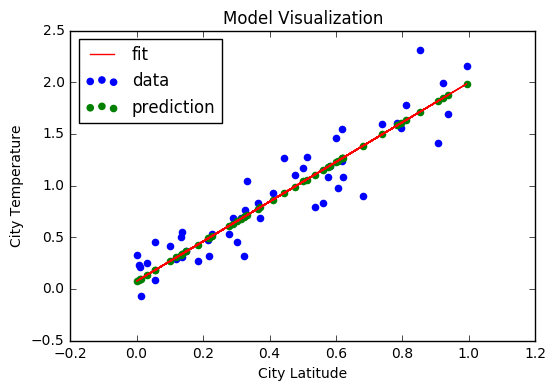

In [15]:
plot_name = "ML_regression"
plt.scatter(xval, y_actual, color ='b',label="data")
plt.scatter(xval, y_pred, color = 'g', label="prediction")
plt.plot(xval,y_pred, c='red',label='fit')
plt.legend(loc='best')
plt.title('Model Visualization')
plt.xlabel('City Latitude')
plt.ylabel('City Temperature')
plt.savefig('image/%s.pdf' %(plot_name), format='pdf')

## Supervised learning: Classification.

Our question will be this: given a model trained on a portion of the player data, Predict player position from one or more of minutes, shots, passes, tackles, saves.

For this task, we will use an extremely simple logistic regression.

We would like to evaluate the model on data it has not seen before, and so we will split the data into a training set and a testing set. 

This could be done by hand, but it is more convenient to use the **train_test_split utility** function:

Consider the case we want to predict whether a student with certain pass mark can be admitted or not.

In [23]:
admission = pd.read_csv('Data/admission.csv', names = ["grade1", "grade2", "remark"])
admission.head()


,grade1,grade2,remark
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


As the data is two-dimensional, we can plot each sample as a point in a two-dimensional coordinate system, with the first feature being the x-axis and the second feature being the y-axis.

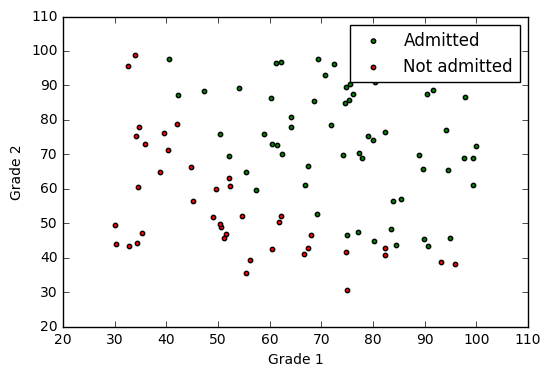

In [24]:
admitted_1 =admission[admission['remark']==1]['grade1']
admitted_2 =admission[admission['remark']==1]['grade2']
not_admitted_1 =admission[admission['remark']==0]['grade1']
not_admitted_2 =admission[admission['remark']==0]['grade2']

plot_name = "scatter_1"
plt.scatter(admitted_1,admitted_2,c='green',s=10)
plt.scatter(not_admitted_1,not_admitted_2,c='red',s=10)
plt.xlabel('Grade 1')
plt.ylabel('Grade 2')
plt.legend(('Admitted','Not admitted'),scatterpoints=1,loc='upper right')
plt.savefig('image/%s.pdf' %(plot_name), format='pdf')          

Classification is a supervised task, and since we are interested in its performance on unseen data, we split our data into two parts:

* a training set that the learning algorithm uses to fit the model
* a test set to evaluate the generalization performance of the model

The train_test_split function from the model_selection module does that for us -- we will use it to split a dataset into 75% training data and 25% test data.

In [25]:
features = ['grade1', 'grade2']
X = admission[features]
y = admission.remark

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234)

In [27]:
from sklearn.linear_model import LogisticRegression   # 1. choose model class
model = LogisticRegression()               # 2. instantiate model
model.fit(X_train, y_train)                           # 3. fit model to data
y_pred = model.predict(X_test)                        # 4. predict on new data

We can evaluate our classifier quantitatively by measuring what fraction of predictions is correct. This is called accuracy:

In [28]:
np.mean(y_pred == y_test)

0.95999999999999996

It clear that our model achieve a test accuracy of $95.99\%$ 

There is also a convenience function , score, that all scikit-learn classifiers have to compute this directly from the test data:

In [29]:
model.score(X_test, y_test)

0.95999999999999996

## Another classifier: K Nearest Neighbors¶
Another popular and easy to understand classifier is K nearest neighbors (kNN). It has one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

The interface is exactly the same as for LogisticRegression above.

In [30]:
# defining the model with its associated parameters
from sklearn.neighbors import KNeighborsClassifier   # 1. choose model class
knn = KNeighborsClassifier(n_neighbors=1)               # 2. instantiate model
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)                        # 4. predict on new data

### Exercise¶
Apply the KNeighborsClassifier to the player dataset. Play with different values of the n_neighbors and observe how training and test score change.

## Another classifier:  RANDOM FOREST¶

A random forest is a 'meta estimator'. It will fit a number of decision trees (we'll have to tell it how many) on various sub-samples of the dataset. Then it will use averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rForest = RandomForestClassifier(n_estimators=10)
rForest.fit(X_train, y_train) 
y_pred = rForest.predict(X_test)  

In [ ]:
rForest.score(X_test, y_test)

### Exercise¶
Apply the Random Forest to the player dataset. Play with different values of the n_estimators and observe how training and test score change.

## Supervised Learning: Regression Analysis

In regression we are trying to predict a continuous output variable -- in contrast to the nominal variables we were predicting in the previous classification examples.

## Linear Regression

In [ ]:
data = pd.read_csv('Data/Cities.csv')
X = data.latitude
X = X[:, np.newaxis]
y = data.temperature

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Next, we use the learning algorithm implemented in LinearRegression to fit a regression model to the training data:

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

After fitting to the training data, we paramerterized a linear regression model with the following values.


In [ ]:
print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

Similar to the estimators for classification in the previous notebook, we use the predict method to predict the target variable. And we expect these predicted values to fall onto the line that we plotted previously:

In [ ]:
y_pred_train = regressor.predict(X_train)
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best')

Scikit-learn provides an easy way to evaluate the prediction quantitatively using the score method. For regression tasks, this is the R2 score (cost). Another popular way would be the Mean Squared Error (MSE). As its name implies, the MSE is simply the average squared difference over the predicted and actual target values.

In [ ]:
regressor.score(X_test, y_test)

In [ ]:
# Loop asking user for city name, compute predicted + actual temperature
while True:
    name = input('Enter city name (or "quit" to quit): ')
    if name == 'quit': break
    city = data[data.city == name]
    if len(city) == 0:
        print ('City not in dataset')
    else:
        # Use float() to convert dataframe element to value
        print ('Predicted temperature:', regressor.coef_[0] * float(city.latitude) + regressor.intercept_)
        print ('Actual temperature:', float(city.temperature))

## Exercise

* From the players data, compute and plot a linear regression for minutes played (x-axis) versus passes made (y-axis).
* Use linear regression for interactive number-of-passes predictor: compute minutes-passes regression for players from Greece, USA, and Portugal

### KNeighborsRegression
As for classification, we can also use a neighbor based method for regression. We can simply take the output of the nearest point, or we could average several nearest points. This method is less popular for regression than for classification, but still a good baseline.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(X_train, y_train)

####  Let us look at the behavior on training and test set:

In [ ]:
y_pred_test = kneighbor_regression.predict(X_test)

plt.plot(X_test, y_test, 'o', label="data", markersize=8)
plt.plot(X_test, y_pred_test, 's', label="prediction", markersize=4)
plt.legend(loc='best');

In [ ]:
kneighbor_regression.score(X_test, y_test)

In [ ]:
# Loop asking user for city name, compute predicted + actual temperature
while True:
    name = input('Enter city name (or "quit" to quit): ')
    if name == 'quit': break
    city = data[data.city == name]
    if len(city) == 0:
        print ('City not in dataset')
    else:
        # Use float() to convert dataframe element to value
        temp_pred = kneighbor_regression.predict(city.latitude))
        print ('Predicted temperature:', temp_pred[0])
        print ('Actual temperature:', float(city.temperature))

## References

* [Introduction to Machine Learning in Python with scikit-learn](http://ipython-books.github.io/featured-04/)
* [Introduction to Machine Learning with Python](https://github.com/amueller/introduction_to_ml_with_python)
* [Scikit-learn tutorial at SciPy2016](https://github.com/amueller/scipy-2016-sklearn)